In [1]:
import pandas as pd
 
from matplotlib.pyplot import figure
import seaborn as sns

In [7]:
import pandas as pd
pd.read_csv('data_analysis_new.csv')

,Unnamed: 0,loss,conv,dataset,train acc micro,test acc micro,train acc macro,test acc macro
0,0,HOPE_Katz,GCN,0.10.10.225,0.697575,0.155779,0.696474,0.152992
1,1,HOPE_Katz,GAT,0.10.10.225,0.406562,0.145729,0.404279,0.141180
2,2,HOPE_Katz,SAGE,0.10.10.225,0.522111,0.040201,0.518637,0.038815
3,3,HOPE_Katz,GCN,0.10.10.2220,0.560628,0.195980,0.561337,0.196158
4,4,HOPE_Katz,GAT,0.10.10.2220,0.473609,0.135678,0.477244,0.129267
...,...,...,...,...,...,...,...,...
541,541,HOPE_Katz,GAT,0.90.90.5320,0.701854,0.276382,0.703642,0.284910
542,542,HOPE_Katz,SAGE,0.90.90.5320,0.562054,0.055276,0.560821,0.050998
543,543,HOPE_Katz,GCN,0.90.90.545,0.589158,0.281407,0.592610,0.273859
544,544,HOPE_Katz,GAT,0.90.90.545,0.430813,0.281407,0.430724,0.262344


In [2]:
losses=['DeepWalk','DeepWalk','DeepWalk','Node2Vec','Node2Vec','Node2Vec','VERSE (Adj)','VERSE (Adj)','VERSE (Adj)','VERSE (PPR)','VERSE (PPR)','VERSE (PPR)', 'VERSE (SimRank)','VERSE (SimRank)','VERSE (SimRank)', 
'LINE','LINE','LINE','APP','APP','APP','HOPE (Katz)','HOPE (Katz)','HOPE (Katz)','HOPE (RPR)','HOPE (RPR)','HOPE (RPR)','HOPE (CN)','HOPE (CN)','HOPE (CN)',
'HOPE (AA)','HOPE (AA)','HOPE (AA)','GF','GF','GF','Laplacian eigenmaps','Laplacian eigenmaps','Laplacian eigenmaps','Supervised (features as init)','Supervised (features as init)','Supervised (features as init)','Features']
convs =['GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','-']

types = ['Random Walks','Random Walks','Random Walks','Random Walks','Random Walks','Random Walks','SimMatrix','SimMatrix','SimMatrix','SimMatrix','SimMatrix','SimMatrix','SimMatrix','SimMatrix','SimMatrix','SimMatrix','SimMatrix','SimMatrix','SimMatrix','SimMatrix','SimMatrix', 'Factorization','Factorization','Factorization','Factorization','Factorization','Factorization','Factorization','Factorization','Factorization','Factorization','Factorization','Factorization','Factorization','Factorization','Factorization', 'Laplacian EigenMaps','Laplacian EigenMaps','Laplacian EigenMaps','Supervised','Supervised','Supervised','Features']#[1]*2*3 + [2]*3*4+[3]*3*5+
cora_micro = [0.8189,0.7597,0.8078,0.8226,0.7800,0.7985,0.7188,0.6767,0.7383,0.6737,0.6511,0.7038,0.3253,0.3179,0.7116,0.8429,0.7948,0.8189,0.7874,
0.7689,0.8004,0.6580,0.4436,0.6433,0.5028,0.5323,0.3752,0.7135,0.7227,0.5545,0.5342,0.5360,0.4399,0.6026,0.7006,0.5712,0.3179,
0.3179,0.3179,0.8946,0.8429,0.8835,0.4233]
cora_macro = [0.7905,0.7179,0.7793,0.7982,0.7425,0.7679,0.6500,0.6053,0.6970,0.5879,0.5731,0.6520,0.0834,0.0689,0.6491,0.8177,0.7792,0.7684,0.7108,0.6821,0.7570,0.6053,0.2987,0.5977,0.3021,0.3570,0.1631,0.6760,0.6629,0.5110,0.4214,0.4050,0.3045,0.4928,0.6370,0.4857,0.0689,0.0689,0.0689, 0.8846, 0.8250, 0.8737,0.2306]
citeseer_micro =[0.7534,0.7008,0.7624,0.7654,0.7233,0.7549,0.7930,0.7616,0.7689,0.6737,0.6511,0.7038,0.6876,0.6137,0.7301,0.6286,0.5835,0.7459,0.7353,0.7158,0.7308,0.2538,0.2538,0.2544,0.6451,0.7053,0.6316,0.6030,0.6090,0.5353,0.5749,0.5453,0.4473,0.6211,0.6451,0.5579,0.1534,0.1534,0.1609,0.7699,0.7504,0.7744,0.5654]
citeseer_macro = [0.6794,0.6397,0.7030,0.7080,0.6614,0.6961,0.7484,0.7095,0.7468,0.5879,0.5731,0.6520,0.6443,0.5174,0.6702,0.5506,0.5129,0.6712,0.6428,0.6246,0.6433,0.0506,0.0506,0.0547,0.5545,0.6163,0.5504,0.5278,0.5374,0.4724,0.4546,0.3974,0.3137,0.5473,0.5653,0.4835,0.0443,0.0443,0.0561,0.7319,0.7194,0.7368,0.4710]
photo_micro = [0.8503,0.6932,0.7671,0.4879,0.6645,0.8607,0.2538,0.2538,0.2544,0.2538,0.8503,0.2551,0.2538,0.2538,0.2551,0.4644,0.6651,0.5487,0.3087,0.4127,0.6344,0.6311,0.4526,0.5612,0.2858,0.5186,0.2538,0.4179,0.5762,0.4761,0.6050,0.6913,0.3597,0.7744,0.7155,0.4160,0.2538,0.2538,0.2551,0.9228,0.9418,0.9451,0.3728]
photo_macro = [0.8182,0.6657,0.7225,0.3319,0.4817,0.8210,0.0506,0.0506,0.0547,0.0506,0.8182,0.0560,0.0506,0.0506,0.0560,0.2761,0.5099,0.3435,0.1024,0.1405,0.4855,0.5392,0.2341,0.4135,0.0902,0.2757,0.0506,0.1853,0.4106,0.2638,0.4620,0.5853,0.1229,0.6887,0.6114,0.1425,0.0506,0.0506,0.0560,0.9020,0.9385,0.9345,0.1376]
chameleon_micro =[0.2374,0.2022,0.1824,0.2396,0.2198,0.2066,0.4879,0.5011,0.4835,0.4637,0.4505,0.4198,0.4527,0.5033,0.3978,0.4549,0.4747,0.4747,0.4791,0.5253,0.4374,0.3758,0.4110,0.4286,0.4022,0.4835,0.3780,0.4835,0.4945,0.4703,0.4637,0.4176,0.4462,0.3341,0.4484,0.4286,0.3473,0.3187,0.2176,0.6000,0.4923,0.6549,0.4725]
chameleon_macro = [0.0769,0.1185,0.0710,0.0776,0.1029,0.0778,0.4772,0.4913,0.4814,0.4550,0.4478,0.4163,0.4395,0.4989,0.3916,0.4463,0.4545,0.4708,0.4704,0.5182,0.4216,0.3432,0.3665,0.4261,0.3524,0.4543,0.3570,0.4772,0.4855,0.4651,0.4372,0.3989,0.4363,0.3247,0.4396,0.3905,0.2705,0.2410,0.1888,0.5938,0.4781,0.6563,0.4632]
sim_matrix = ['Random Walks','Random Walks','Random Walks','Random Walks','Random Walks','Random Walks','DA','DA','DA','PPR','PPR','PPR','SimRank','SimRank','SimRank','A','A','A','approx PPR','approx PPR','approx PPR','Katz','Katz','Katz', 'PPR','PPR','PPR','Сommon Neighbours','Сommon Neighbours','Сommon Neighbours','Adamic-Adar','Adamic-Adar','Adamic-Adar','A','A','A','A','A','A','Supervised','Supervised','Supervised','Features']


In [3]:
arxiv_auc = [0.8559,0.8696,0.8521,0.8390,0.8423,0.6762,0.7172,0.6287,0.6821,0.5000,0.5000,0.6179,0.7886,0.8086,0.6384,0.8485,0.8589,0.8617,0.7679,0.7800,0.7495,0.6110,0.7180,0.6785,0.8227,0.8451,0.7872,0.7964,0.7821,0.7386,0.7511,0.7717,0.7836,0.8145,0.8659,0.8581,0.5155,0.5238,0.5000]

In [4]:
data_lp = {'Тип функции потерь':types[:39],'Функция потерь':losses[:39],'Матрица sim': sim_matrix[:39],'Сверточный слой':convs[:39],'Arxiv':arxiv_auc}
results_lp=pd.DataFrame.from_dict(data_lp)

In [5]:
data_micro = {'Тип функции потерь':types,'Функция потерь':losses,'Матрица sim': sim_matrix,'Сверточный слой':convs,'Cora':cora_micro, 'Citeseer':citeseer_micro,'Photo':photo_micro,'Chameleon': chameleon_micro}
results_micro=pd.DataFrame.from_dict(data_micro)

In [6]:

data_macro = {'Тип функции потерь':types,'Функция потерь':losses,'Матрица sim': sim_matrix,'Сверточный слой':convs,'Cora':cora_macro,'Citeseer':citeseer_macro,'Photo':photo_macro,'Chameleon':chameleon_macro}
results_macro=pd.DataFrame.from_dict(data_macro)

In [8]:
pd.concat([hm_data[4:],hm_data[2:3],hm_data[3:4],hm_data[:1],hm_data[1:2]])

NameError: name 'hm_data' is not defined

**heatmaps**

KeyError: "['Cora Micro-F1'] not in index"

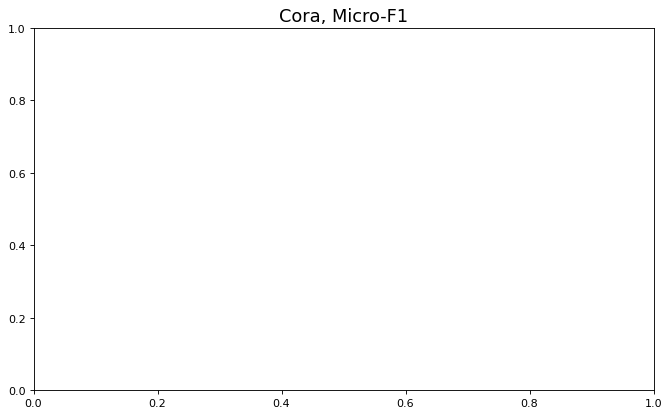

In [9]:
import matplotlib.pyplot as plt
#ax = plt.axes()
fig = figure(figsize=(10, 6), dpi=80)
plt.title('Cora, Micro-F1',fontsize=16)
df1 = results_micro[['Тип функции потерь','Сверточный слой','Cora Micro-F1']]
results_losstype_conv=df1.groupby(['Тип функции потерь','Сверточный слой']).mean(['Cora Micro-F1']).mean(axis=1).reset_index(name ='mean f1')#.sort_values(by=['mean f1'])
print(hm_data)
pd.concat([hm_data[4:],hm_data[2:3],hm_data[3:4],hm_data[:1],hm_data[1:2]])

hm_data = results_losstype_conv.pivot("Тип функции потерь", "Сверточный слой", "mean f1")
ax = sns.heatmap(pd.concat([hm_data[4:],hm_data[2:3],hm_data[3:4],hm_data[:1],hm_data[1:2]]),annot=True,cmap="RdYlGn")


Сверточный слой          GAT      GCN     SAGE
Тип функции потерь                            
Factorization        0.58704  0.60222  0.51682
Laplacian EigenMaps  0.31790  0.31790  0.31790
Random Walks         0.76985  0.82075  0.80315
SimMatrix            0.64188  0.66962  0.75460
Supervised           0.84290  0.89460  0.88350


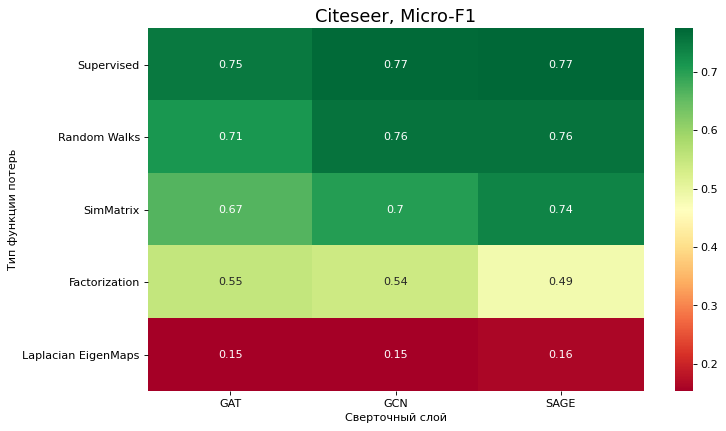

In [194]:
import matplotlib.pyplot as plt
#ax = plt.axes()
fig = figure(figsize=(10, 6), dpi=80)
plt.title('Citeseer, Micro-F1',fontsize=16)
df1 = results_micro[['Тип функции потерь','Сверточный слой','Citeseer Micro-F1']]
results_losstype_conv=df1.groupby(['Тип функции потерь','Сверточный слой']).mean(['Citeseer Micro-F1']).mean(axis=1).reset_index(name ='mean f1')#.sort_values(by=['mean f1'])
print(hm_data)
pd.concat([hm_data[4:],hm_data[2:3],hm_data[3:4],hm_data[:1],hm_data[1:2]])

hm_data = results_losstype_conv.pivot("Тип функции потерь", "Сверточный слой", "mean f1")
ax = sns.heatmap(pd.concat([hm_data[4:],hm_data[2:3],hm_data[3:4],hm_data[:1],hm_data[1:2]]),annot=True,cmap="RdYlGn")


Сверточный слой          GAT      GCN     SAGE
Тип функции потерь                            
Factorization        0.59084  0.54284  0.41336
Laplacian EigenMaps  0.25380  0.25380  0.25510
Random Walks         0.67885  0.66910  0.81390
SimMatrix            0.48714  0.30690  0.38954
Supervised           0.94180  0.92280  0.94510


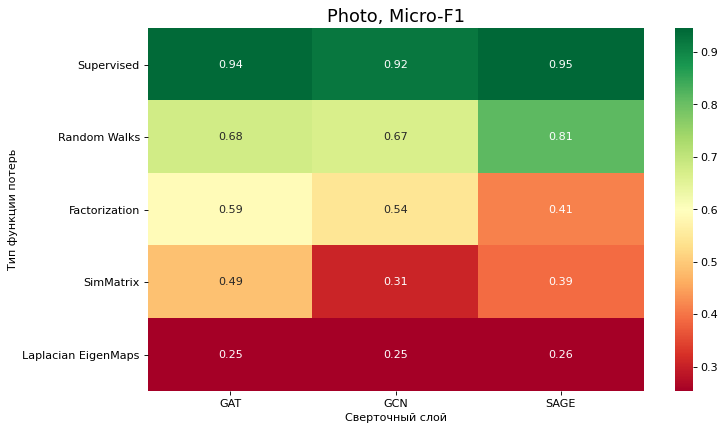

In [196]:
import matplotlib.pyplot as plt
#ax = plt.axes()
fig = figure(figsize=(10, 6), dpi=80)
plt.title('Photo, Micro-F1',fontsize=16)
df1 = results_micro[['Тип функции потерь','Сверточный слой','Photo Micro-F1']]
results_losstype_conv=df1.groupby(['Тип функции потерь','Сверточный слой']).mean(['Photo Micro-F1']).mean(axis=1).reset_index(name ='mean f1')#.sort_values(by=['mean f1'])
print(hm_data)
pd.concat([hm_data[4:],hm_data[2:3],hm_data[3:4],hm_data[:1],hm_data[1:2]])

hm_data = results_losstype_conv.pivot("Тип функции потерь", "Сверточный слой", "mean f1")
ax = sns.heatmap(pd.concat([hm_data[4:],hm_data[2:3],hm_data[:1],hm_data[3:4],hm_data[1:2]]),annot=True,cmap="RdYlGn")


Сверточный слой          GAT      GCN     SAGE
Тип функции потерь                            
Factorization        0.45100  0.41186  0.43034
Laplacian EigenMaps  0.31870  0.34730  0.21760
Random Walks         0.21100  0.23850  0.19450
SimMatrix            0.49098  0.46766  0.44264
Supervised           0.49230  0.60000  0.65490


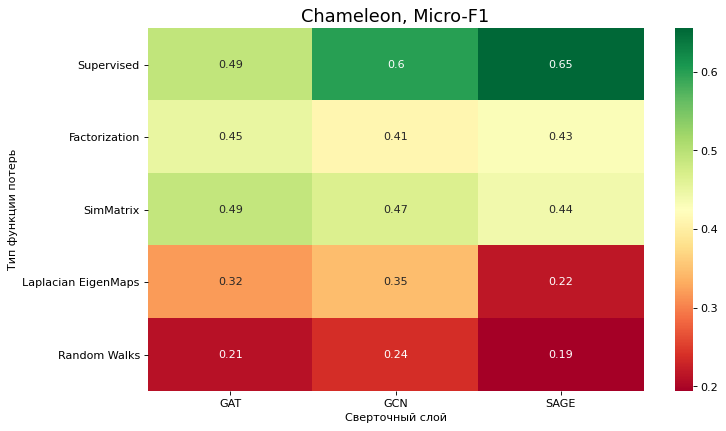

In [198]:
import matplotlib.pyplot as plt
#ax = plt.axes()
fig = figure(figsize=(10, 6), dpi=80)
plt.title('Chameleon, Micro-F1',fontsize=16)
df1 = results_micro[['Тип функции потерь','Сверточный слой','Chameleon Micro-F1']]
results_losstype_conv=df1.groupby(['Тип функции потерь','Сверточный слой']).mean(['Chameleon Micro-F1']).mean(axis=1).reset_index(name ='mean f1')#.sort_values(by=['mean f1'])
print(hm_data)
pd.concat([hm_data[4:],hm_data[2:3],hm_data[3:4],hm_data[:1],hm_data[1:2]])

hm_data = results_losstype_conv.pivot("Тип функции потерь", "Сверточный слой", "mean f1")
ax = sns.heatmap(pd.concat([hm_data[4:],hm_data[:1],hm_data[3:4],hm_data[1:2],hm_data[2:3]]),annot=True,cmap="RdYlGn")


In [203]:
results_macro

,Тип функции потерь,Функция потерь,Матрица sim,Сверточный слой,Cora Micro-F1,Citeseer Micro-F1,Photo Micro-F1,Chameleon Micro-F1
0,Random Walks,DeepWalk,Random Walks,GCN,0.8189,0.7534,0.8503,0.2374
1,Random Walks,DeepWalk,Random Walks,GAT,0.7597,0.7008,0.6932,0.2022
2,Random Walks,DeepWalk,Random Walks,SAGE,0.8078,0.7624,0.7671,0.1824
3,Random Walks,Node2Vec,Random Walks,GCN,0.8226,0.7654,0.4879,0.2396
4,Random Walks,Node2Vec,Random Walks,GAT,0.7800,0.7233,0.6645,0.2198
5,Random Walks,Node2Vec,Random Walks,SAGE,0.7985,0.7549,0.8607,0.2066
6,SimMatrix,VERSE (Adj),DA,GCN,0.7188,0.7930,0.2538,0.4879
7,SimMatrix,VERSE (Adj),DA,GAT,0.6767,0.7616,0.2538,0.5011
8,SimMatrix,VERSE (Adj),DA,SAGE,0.7383,0.7689,0.2544,0.4835
9,SimMatrix,VERSE (PPR),PPR,GCN,0.6737,0.6737,0.2538,0.4637


KeyError: "['Cora Macro-F1'] not in index"

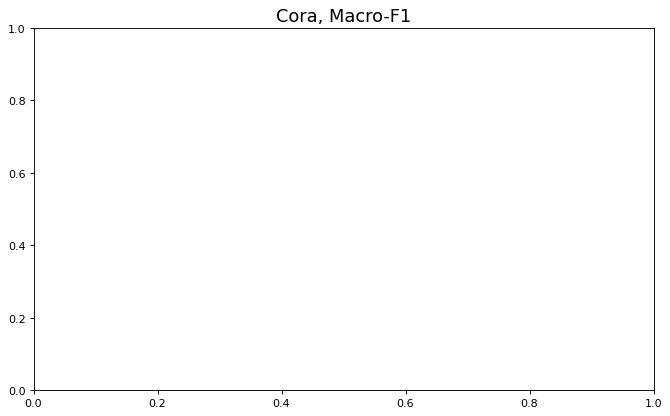

In [5]:
import matplotlib.pyplot as plt
#ax = plt.axes()
fig = figure(figsize=(10, 6), dpi=80)
plt.title('Cora, Macro-F1',fontsize=16)
df1 = results_macro[['Тип функции потерь','Сверточный слой','Cora Macro-F1']]
results_losstype_conv=df1.groupby(['Тип функции потерь','Сверточный слой']).mean(['Cora Macro-F1']).mean(axis=1).reset_index(name ='mean f1')#.sort_values(by=['mean f1'])
print(hm_data)
pd.concat([hm_data[4:],hm_data[2:3],hm_data[3:4],hm_data[:1],hm_data[1:2]])

hm_data = results_losstype_conv.pivot("Тип функции потерь", "Сверточный слой", "mean f1")
ax = sns.heatmap(pd.concat([hm_data[4:],hm_data[2:3],hm_data[3:4],hm_data[:1],hm_data[1:2]]),annot=True,cmap="RdYlGn")


Сверточный слой          GAT      GCN     SAGE
Тип функции потерь                            
Factorization        0.45100  0.41186  0.43034
Laplacian EigenMaps  0.31870  0.34730  0.21760
Random Walks         0.21100  0.23850  0.19450
SimMatrix            0.49098  0.46766  0.44264
Supervised           0.49230  0.60000  0.65490


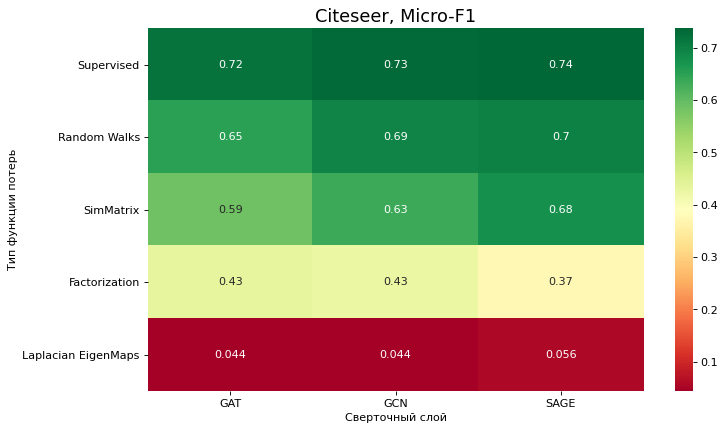

In [210]:
import matplotlib.pyplot as plt
#ax = plt.axes()
fig = figure(figsize=(10, 6), dpi=80)
plt.title('Citeseer, Micro-F1',fontsize=16)
df1 = results_macro[['Тип функции потерь','Сверточный слой','Citeseer Macro-F1']]
results_losstype_conv=df1.groupby(['Тип функции потерь','Сверточный слой']).mean(['Citeseer Macro-F1']).mean(axis=1).reset_index(name ='mean f1')#.sort_values(by=['mean f1'])
print(hm_data)
pd.concat([hm_data[4:],hm_data[2:3],hm_data[3:4],hm_data[:1],hm_data[1:2]])

hm_data = results_losstype_conv.pivot("Тип функции потерь", "Сверточный слой", "mean f1")
ax = sns.heatmap(pd.concat([hm_data[4:],hm_data[2:3],hm_data[3:4],hm_data[:1],hm_data[1:2]]),annot=True,cmap="RdYlGn")


Сверточный слой          GAT      GCN     SAGE
Тип функции потерь                            
Factorization        0.43340  0.42696  0.37494
Laplacian EigenMaps  0.04430  0.04430  0.05610
Random Walks         0.65055  0.69370  0.69955
SimMatrix            0.58750  0.63480  0.67670
Supervised           0.71940  0.73190  0.73680


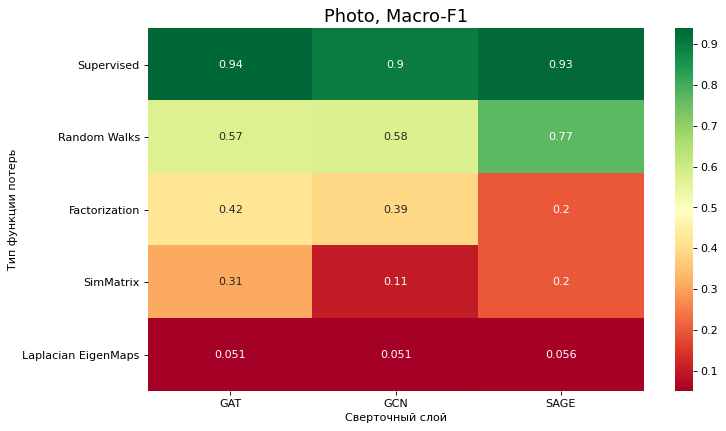

In [212]:
import matplotlib.pyplot as plt
#ax = plt.axes()
fig = figure(figsize=(10, 6), dpi=80)
plt.title('Photo, Macro-F1',fontsize=16)
df1 = results_macro[['Тип функции потерь','Сверточный слой','Photo Macro-F1']]
results_losstype_conv=df1.groupby(['Тип функции потерь','Сверточный слой']).mean(['Photo Macro-F1']).mean(axis=1).reset_index(name ='mean f1')#.sort_values(by=['mean f1'])
print(hm_data)
pd.concat([hm_data[4:],hm_data[2:3],hm_data[3:4],hm_data[:1],hm_data[1:2]])

hm_data = results_losstype_conv.pivot("Тип функции потерь", "Сверточный слой", "mean f1")
ax = sns.heatmap(pd.concat([hm_data[4:],hm_data[2:3],hm_data[:1],hm_data[3:4],hm_data[1:2]]),annot=True,cmap="RdYlGn")


Сверточный слой          GAT      GCN     SAGE
Тип функции потерь                            
Factorization        0.42342  0.39308  0.19866
Laplacian EigenMaps  0.05060  0.05060  0.05600
Random Walks         0.57370  0.57505  0.77175
SimMatrix            0.31396  0.10606  0.19914
Supervised           0.93850  0.90200  0.93450


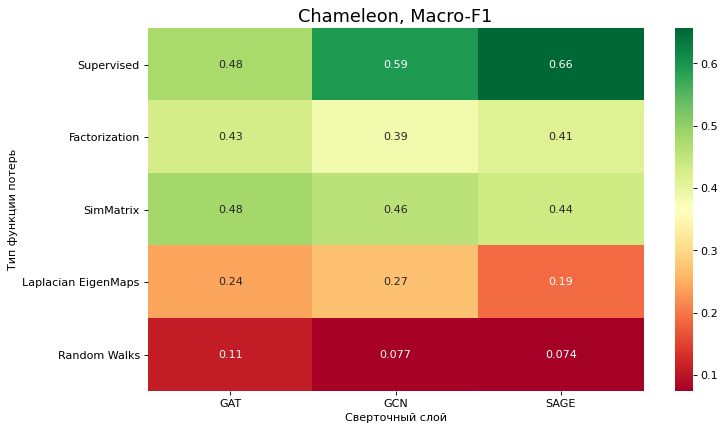

In [214]:
import matplotlib.pyplot as plt
#ax = plt.axes()
fig = figure(figsize=(10, 6), dpi=80)
plt.title('Chameleon, Macro-F1',fontsize=16)
df1 = results_macro[['Тип функции потерь','Сверточный слой','Chameleon Macro-F1']]
results_losstype_conv=df1.groupby(['Тип функции потерь','Сверточный слой']).mean(['Chameleon Macro-F1']).mean(axis=1).reset_index(name ='mean f1')#.sort_values(by=['mean f1'])
print(hm_data)
pd.concat([hm_data[4:],hm_data[2:3],hm_data[3:4],hm_data[:1],hm_data[1:2]])

hm_data = results_losstype_conv.pivot("Тип функции потерь", "Сверточный слой", "mean f1")
ax = sns.heatmap(pd.concat([hm_data[4:],hm_data[:1],hm_data[3:4],hm_data[1:2],hm_data[2:3]]),annot=True,cmap="RdYlGn")


In [248]:
results_losstype_data

,Cora,Citeseer,Photo,Chameleon
Матрица sim,,,,
A,0.587189,0.472200,0.482978,0.388778
A^2,0.663567,0.582433,0.490067,0.482767
Adamic-Adar,0.503367,0.522500,0.552000,0.442500
DA,0.711267,0.774500,0.254000,0.490833
Katz,0.581633,0.254000,0.548300,0.405133
PPR,0.573150,0.668433,0.402900,0.432950
Random Walks,0.797917,0.743367,0.720617,0.214667
SimRank,0.451600,0.677133,0.254233,0.451267
Supervised,0.873667,0.764900,0.936567,0.582400


In [61]:
results_losstype_data

,Cora,Citeseer,Photo,Chameleon
Матрица sim,,,,
A,0.465278,0.386167,0.303256,0.358522
A^2,0.616633,0.512533,0.286567,0.475933
Adamic-Adar,0.376967,0.388567,0.390067,0.424133
DA,0.650767,0.734900,0.051967,0.483300
Katz,0.500567,0.051967,0.395600,0.378600
PPR,0.439200,0.589033,0.223550,0.413800
Random Walks,0.766050,0.681267,0.640167,0.087450
SimRank,0.267133,0.610633,0.052400,0.443333
Supervised,0.861100,0.729367,0.925000,0.576067


In [9]:
results_losstype_data

,Cora,Citeseer,Photo,Chameleon
Матрица sim,,,,
A,0.587189,0.472200,0.482978,0.388778
A^2,0.663567,0.582433,0.490067,0.482767
Adamic-Adar,0.503367,0.522500,0.552000,0.442500
DA,0.711267,0.774500,0.254000,0.490833
Features,0.423300,0.565400,0.372800,0.472500
Katz,0.581633,0.254000,0.548300,0.405133
PPR,0.573150,0.668433,0.402900,0.432950
Random Walks,0.797917,0.743367,0.720617,0.214667
SimRank,0.451600,0.677133,0.254233,0.451267


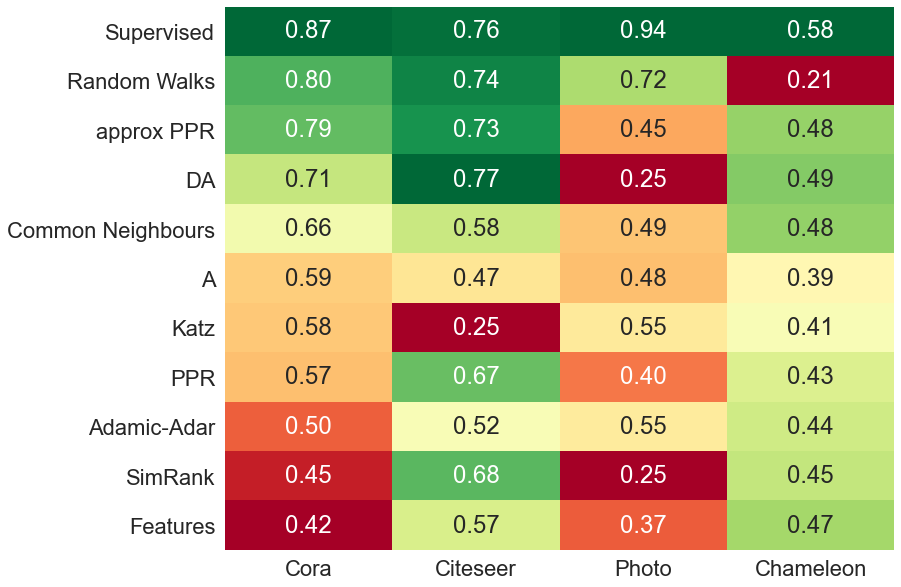

In [6]:
sns.set(font_scale=2)
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
import seaborn as sns
results_losstype_data =results_micro[['Матрица sim','Cora','Citeseer','Photo','Chameleon']].groupby(['Матрица sim']).mean()

df = pd.DataFrame(np.random.rand(4,4))
df = results_losstype_data.sort_values(['Cora'],ascending=False)
cm = ['RdYlGn']*4
f, axs = plt.subplots(1, df.columns.size, gridspec_kw={'wspace': 0},figsize=(12,10))

for i, (s, a, c) in enumerate(zip(df.columns, axs, cm)):
    sns.heatmap(np.array([df[s].values]).T, yticklabels=df.index, xticklabels=[s], annot=True, fmt='.2f', ax=a, cmap=c, cbar=False)
    if i>0:
        a.yaxis.set_ticks([])
  

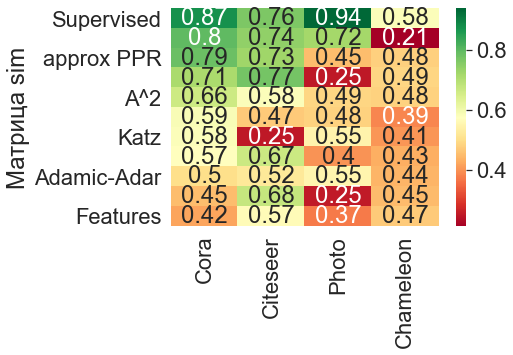

In [6]:


results_losstype_data =results_micro[['Матрица sim','Cora','Citeseer','Photo','Chameleon']].groupby(['Матрица sim']).mean()

ax = sns.heatmap(results_losstype_data.sort_values(['Cora'],ascending=False),annot=True,cmap="RdYlGn")

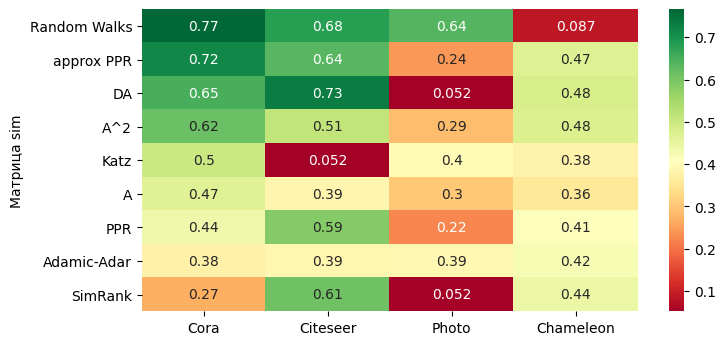

In [260]:
fig = figure(figsize=(8, 4), dpi=100)

results_losstype_data =results_macro[['Матрица sim','Cora','Citeseer','Photo','Chameleon']].groupby(['Матрица sim']).mean()

ax = sns.heatmap(results_losstype_data.sort_values(['Cora'],ascending=False).drop(['Supervised'],axis=0),annot=True,cmap="RdYlGn")

In [415]:
results_losstype_conv

,Функция потерь,Сверточный слой,mean f1
0,APP,GAT,0.7689
1,APP,GCN,0.7874
2,APP,SAGE,0.8004
3,DeepWalk,GAT,0.7597
4,DeepWalk,GCN,0.8189
5,DeepWalk,SAGE,0.8078
6,GF,GAT,0.7006
7,GF,GCN,0.6026
8,GF,SAGE,0.5712
9,HOPE (AA),GAT,0.5360


In [414]:

results_losstype_conv=results_micro[['Функция потерь','Сверточный слой','Cora']][:39].groupby(['Функция потерь','Сверточный слой']).mean().mean(axis=1).reset_index(name ='mean f1')#.sort_values(by=['mean f1'])
results_losstype_conv_new = pd.concat([results_losstype_conv[1:2],results_losstype_conv[9:],results_losstype_conv[7:8],results_losstype_conv[:1],results_losstype_conv[5:7],results_losstype_conv[4:5],results_losstype_conv[3:4],results_losstype_conv[2:3],results_losstype_conv[8:9]])

,Функция потерь,Сверточный слой,mean f1
1,APP,GCN,0.7874
9,HOPE (AA),GAT,0.5360
10,HOPE (AA),GCN,0.5342
11,HOPE (AA),SAGE,0.4399
12,HOPE (CN),GAT,0.7227
13,HOPE (CN),GCN,0.7135
14,HOPE (CN),SAGE,0.5545
15,HOPE (Katz),GAT,0.4436
16,HOPE (Katz),GCN,0.6580
17,HOPE (Katz),SAGE,0.6433


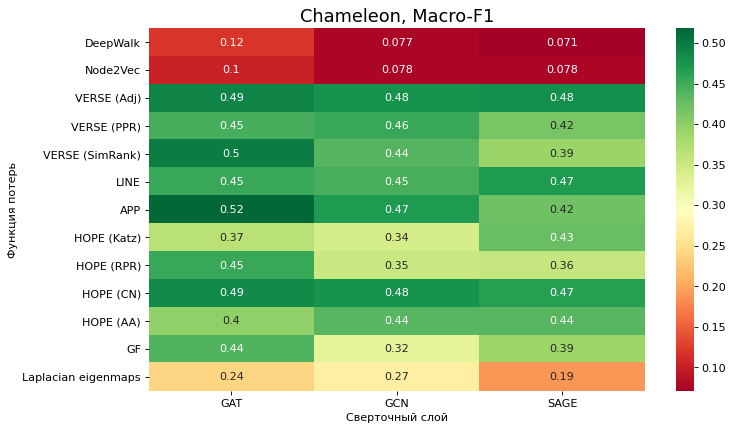

In [424]:
import matplotlib.pyplot as plt
#ax = plt.axes()
fig = figure(figsize=(10, 6), dpi=80)
plt.title('Chameleon, Macro-F1',fontsize=16)

results_losstype_conv=results_macro[['Функция потерь','Сверточный слой','Chameleon']][:39].groupby(['Функция потерь','Сверточный слой']).mean().mean(axis=1).reset_index(name ='mean f1')#.sort_values(by=['mean f1'])
hm_data = results_losstype_conv.pivot("Функция потерь", "Сверточный слой", "mean f1")#.sort_values(['GCN'],ascending=False)
hm_data = pd.concat([hm_data[1:2],hm_data[9:],hm_data[7:8],hm_data[:1],hm_data[5:7],hm_data[4:5],hm_data[3:4],hm_data[2:3],hm_data[8:9]])

ax = sns.heatmap(hm_data,annot=True,cmap="RdYlGn")


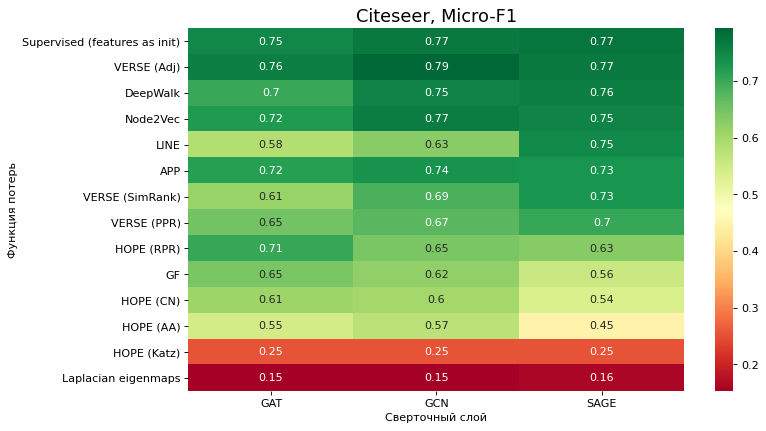

In [391]:
import matplotlib.pyplot as plt
#ax = plt.axes()
fig = figure(figsize=(10, 6), dpi=80)
plt.title('Citeseer, Micro-F1',fontsize=16)

df1 = results_micro[['Функция потерь','Сверточный слой','Citeseer']]
results_losstype_conv=df1.groupby(['Функция потерь','Сверточный слой']).mean(['Citeseer']).mean(axis=1).reset_index(name ='mean f1')#.sort_values(by=['mean f1'])
pd.concat([hm_data[4:],hm_data[2:3],hm_data[3:4],hm_data[:1],hm_data[1:2]])

hm_data = results_losstype_conv.pivot("Функция потерь", "Сверточный слой", "mean f1").sort_values(['SAGE'],ascending=False)
ax = sns.heatmap(hm_data,annot=True,cmap="RdYlGn")


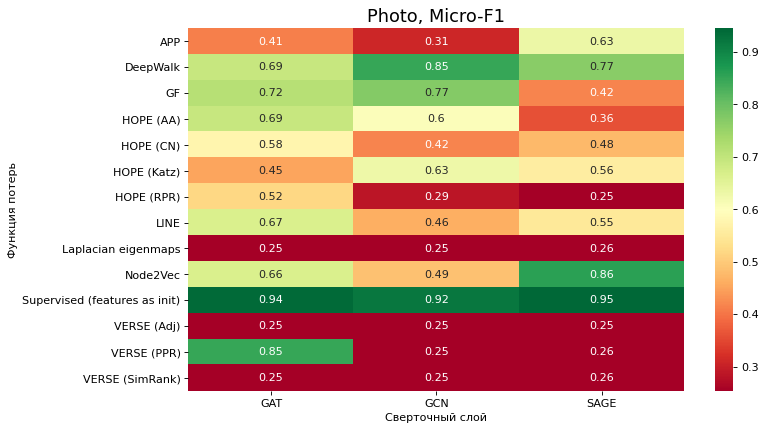

In [377]:
import matplotlib.pyplot as plt
#ax = plt.axes()
fig = figure(figsize=(10, 6), dpi=80)
plt.title('Citeseer, Micro-F1',fontsize=16)

df1 = results_micro[['Функция потерь','Сверточный слой','Citeseer']]
results_losstype_conv=df1.groupby(['Функция потерь','Сверточный слой']).mean(['Citeseer']).mean(axis=1).reset_index(name ='mean f1')#.sort_values(by=['mean f1'])
pd.concat([hm_data[4:],hm_data[2:3],hm_data[3:4],hm_data[:1],hm_data[1:2]])

hm_data = results_losstype_conv.pivot("Функция потерь", "Сверточный слой", "mean f1").sort_values(['SAGE'],ascending=False)
ax = sns.heatmap(hm_data,annot=True,cmap="RdYlGn")


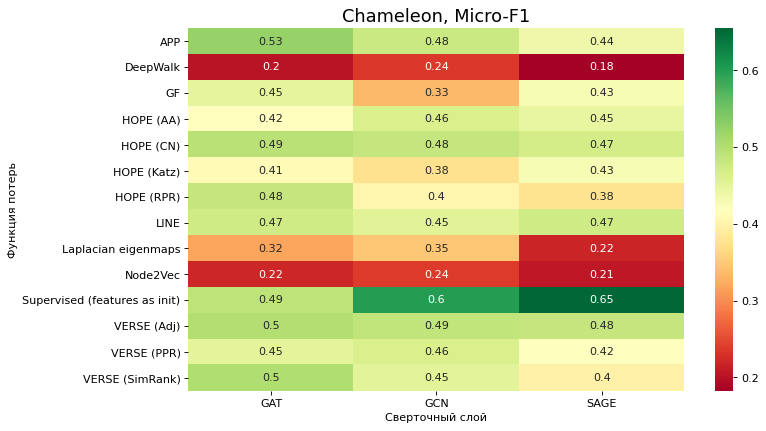

In [376]:
import matplotlib.pyplot as plt
#ax = plt.axes()
fig = figure(figsize=(10, 6), dpi=80)
plt.title('Chameleon, Micro-F1',fontsize=16)

df1 = results_micro[['Функция потерь','Сверточный слой','Chameleon']]
results_losstype_conv=df1.groupby(['Функция потерь','Сверточный слой']).mean(['Chameleon']).mean(axis=1).reset_index(name ='mean f1')#.sort_values(by=['mean f1'])
pd.concat([hm_data[4:],hm_data[2:3],hm_data[3:4],hm_data[:1],hm_data[1:2]])

hm_data = results_losstype_conv.pivot("Функция потерь", "Сверточный слой", "mean f1")
ax = sns.heatmap(hm_data,annot=True,cmap="RdYlGn")


In [66]:
index = ['Supervised','Random Walks','Sim Matrix','Factorization', 'Laplacian EigenMaps']
GCN_Cora = [0.89460,0.82075,0.66962,0.60222,0.31790]
GAT_Cora = [0.84290,0.76985,0.64188,0.58704,0.31790]
SAGE_Cora =  [0.88350,0.80315,0.75460,0.51682,0.31790	]

GCN_Citeseer = [0.76990,0.75940,0.70364,0.53958,0.15340]
GAT_Citeseer = [0.75040,0.71205,0.66514,0.55170,0.15340]
SAGE_Citeseer =  [0.77440,0.75865,0.73590,0.48530,0.16090]

GCN_Photo = [0.92280,0.66910,0.30690,0.54284,0.25380]
GAT_Photo = [0.94180,0.67885,0.48714,0.59084,0.25380]
SAGE_Photo =  [0.94510,0.81390,0.38954,0.41336,0.25510]

GCN_Chameleon = [0.60000,0.23850,0.46766,0.41186,0.34730]
GAT_Chameleon= [0.49230,0.21100,0.49098,0.45100,0.31870]
SAGE_Chameleon =  [0.65490,0.19450,0.44264,0.43034,0.21760]


Text(0.5, 1.0, 'Cora')

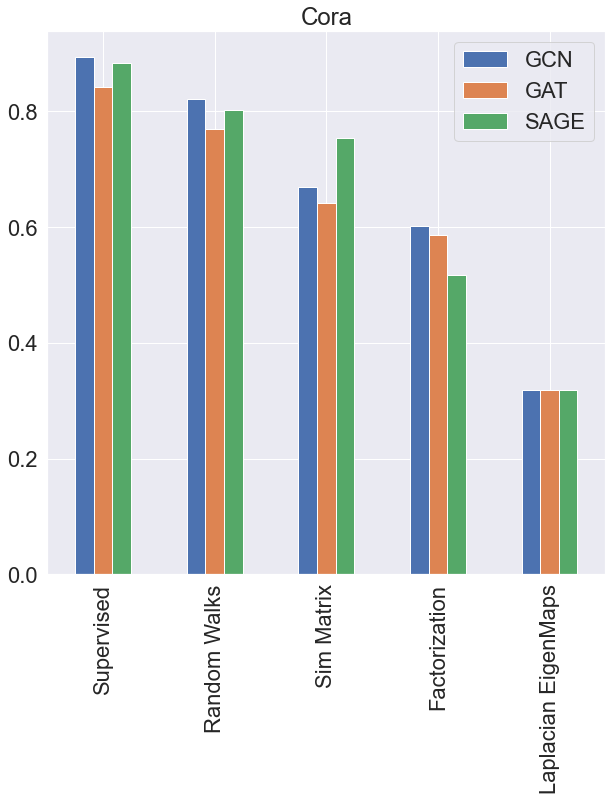

In [68]:
sns.set(font_scale=2)
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
import seaborn as sns


f, axs = plt.subplots(1,figsize=(10,10))

pd.DataFrame({'GCN': GCN_Cora,
                   'GAT':  GAT_Cora,'SAGE':SAGE_Cora}, index=index).plot.bar(ax=axs)
plt.title('Cora')


Text(0.5, 1.0, 'Citeseer')

<Figure size 2000x1000 with 0 Axes>

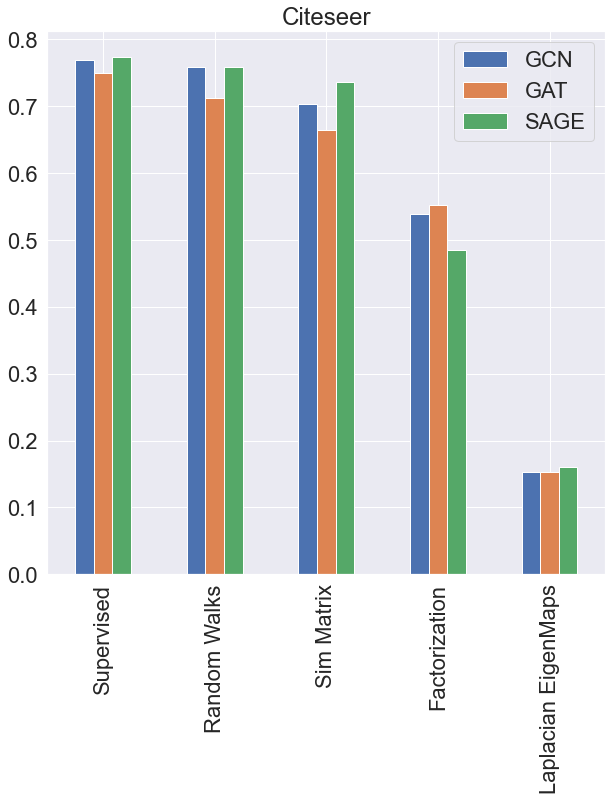

In [69]:
fig = figure(figsize=(20, 10), dpi=100)
f, axs = plt.subplots(1,figsize=(10,10))

pd.DataFrame({'GCN': GCN_Citeseer,
                   'GAT':  GAT_Citeseer,'SAGE':SAGE_Citeseer}, index=index).plot.bar(ax=axs)
plt.title('Citeseer')


Text(0.5, 1.0, 'Photo')

<Figure size 2000x1000 with 0 Axes>

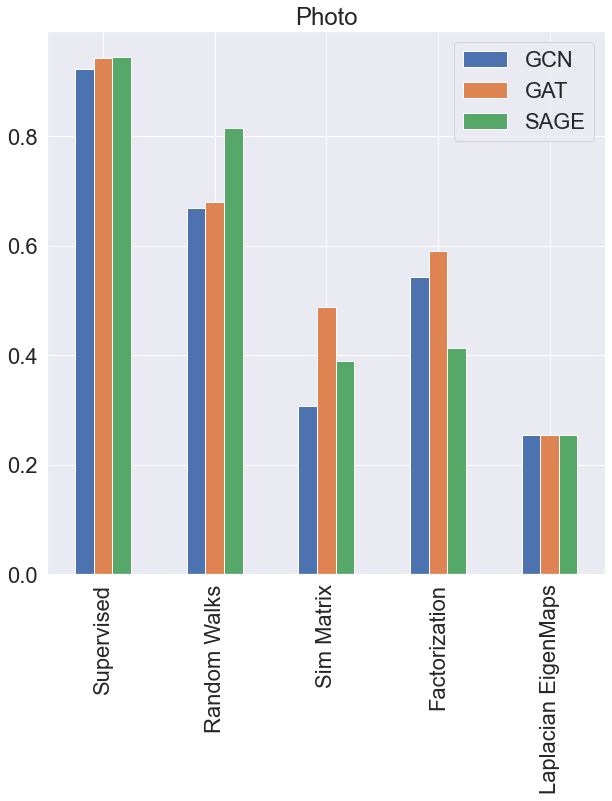

In [70]:
fig = figure(figsize=(20, 10), dpi=100)
f, axs = plt.subplots(1,figsize=(10,10))

pd.DataFrame({'GCN': GCN_Photo,
                   'GAT':  GAT_Photo,'SAGE':SAGE_Photo}, index=index).plot.bar(ax=axs)
plt.title('Photo')


Text(0.5, 1.0, 'Chameleon')

<Figure size 2000x1000 with 0 Axes>

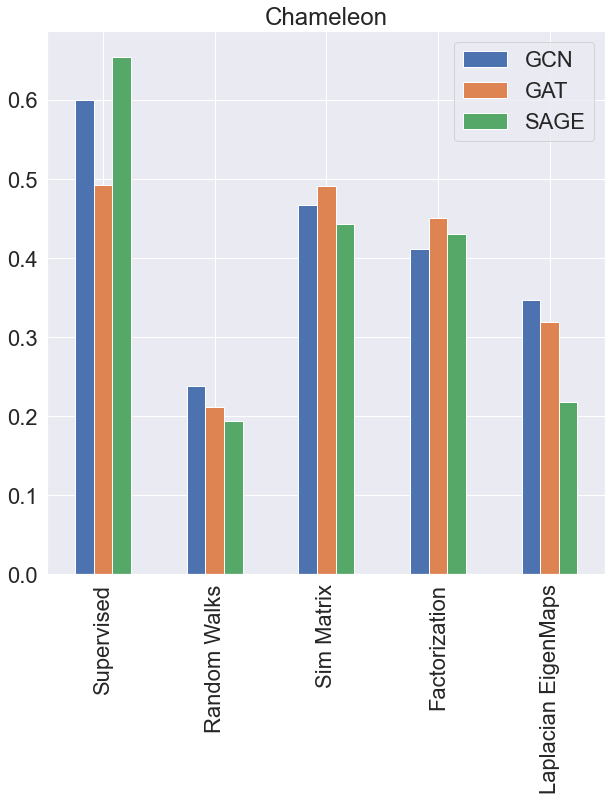

In [71]:
fig = figure(figsize=(20, 10), dpi=100)
f, axs = plt.subplots(1,figsize=(10,10))

pd.DataFrame({'GCN': GCN_Chameleon,
                   'GAT':  GAT_Chameleon,'SAGE':SAGE_Chameleon}, index=index).plot.bar(ax=axs)
plt.title('Chameleon')


In [358]:
types_bar=results_macro.groupby(['Тип функции потерь','Сверточный слой']).mean()
types_bar


Cora  Citeseer    Photo  Chameleon
Тип функции потерь  Сверточный слой                                       
Factorization       GAT              0.47212   0.43340  0.42342    0.42896
                    GCN              0.49952   0.42696  0.39308    0.38694
                    SAGE             0.41240   0.37494  0.19866    0.41500
Laplacian EigenMaps GAT              0.06890   0.04430  0.05060    0.24100
                    GCN              0.06890   0.04430  0.05060    0.27050
                    SAGE             0.06890   0.05610  0.05600    0.18880
Random Walks        GAT              0.73020   0.65055  0.57370    0.11070
                    GCN              0.79435   0.69370  0.57505    0.07725
                    SAGE             0.77360   0.69955  0.77175    0.07440
SimMatrix           GAT              0.54172   0.58750  0.31396    0.48214
                    GCN              0.56996   0.63480  0.10606    0.45768
                    SAGE             0.70470   0.67670  0.19914    0.43634
Supervised          GAT              0.82500   0.71940  0.93850    0.47810
                    GCN              0.88460   0.73190  0.90200    0.59380
                    SAGE             0.87370   0.73680  0.93450    0.65630

In [359]:
index = ['Supervised','Random Walks','Sim Matrix','Factorization', 'Laplacian EigenMaps']
GCN_Cora = [0.88460,0.79435,0.56996,0.49952,0.06890]
GAT_Cora = [0.82500,0.73020,0.54172,0.47212,0.06890]
SAGE_Cora =  [0.87370,0.77360,0.70470,0.41240,0.06890]

GCN_Citeseer = [0.73190,0.69370,0.63480,0.42696,0.0443]
GAT_Citeseer = [0.71940,0.65055,0.58750,0.43340,0.04430]
SAGE_Citeseer =  [0.73680,0.69955,0.67670,0.37494,0.05610]

GCN_Photo = [0.90200,0.57505,0.10606,0.39308,0.05060]
GAT_Photo = [0.93850,0.57370,0.31396,0.42342,0.05060]
SAGE_Photo =  [0.93450,0.77175,0.19914,0.19866,0.05600]

GCN_Chameleon = [0.59380,0.07725,0.45768,0.38694,0.27050]
GAT_Chameleon= [0.47810,0.11070,0.48214,0.42896,0.24100]
SAGE_Chameleon =  [0.65630,0.07440,0.43634,0.41500,0.18880]


Text(0.5, 1.0, 'Cora')

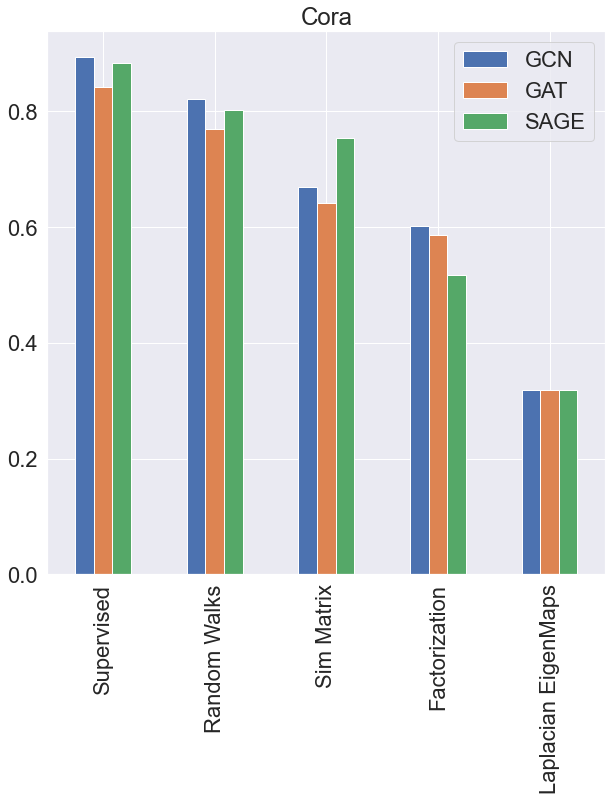

In [72]:
f, axs = plt.subplots(1,figsize=(10,10))

pd.DataFrame({'GCN': GCN_Cora,
                   'GAT':  GAT_Cora,'SAGE':SAGE_Cora}, index=index).plot.bar(ax=axs)
plt.title('Cora')


Text(0.5, 1.0, 'Citeseer')

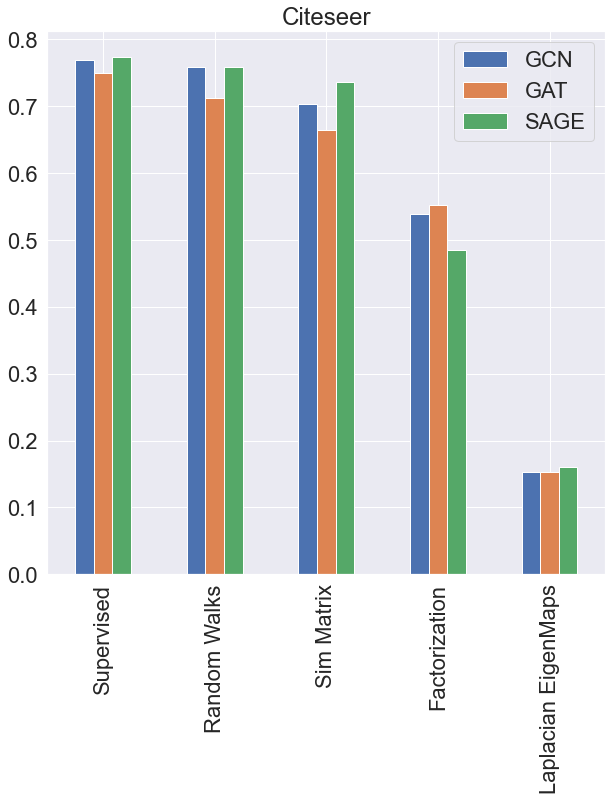

In [73]:
f, axs = plt.subplots(1,figsize=(10,10))

pd.DataFrame({'GCN': GCN_Citeseer,
                   'GAT':  GAT_Citeseer,'SAGE':SAGE_Citeseer}, index=index).plot.bar(ax=axs)
plt.title('Citeseer')


Text(0.5, 1.0, 'Photo')

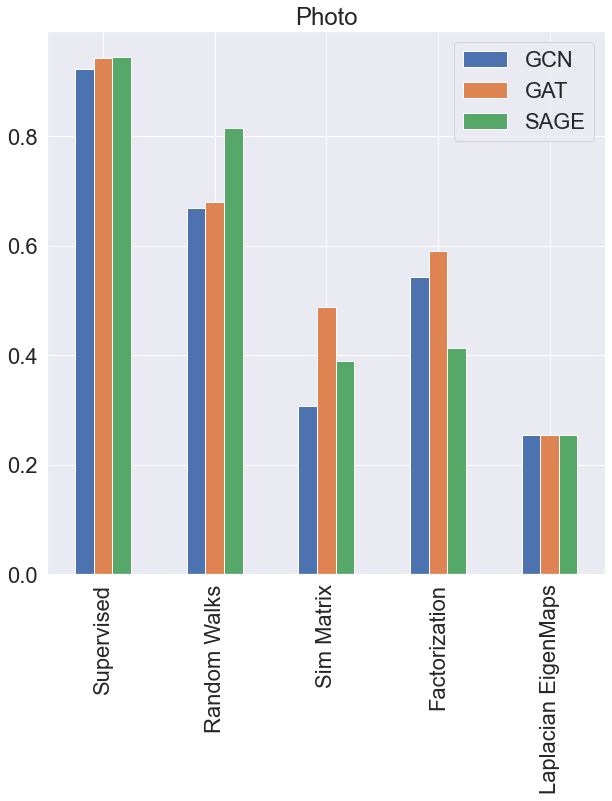

In [74]:
f, axs = plt.subplots(1,figsize=(10,10))
pd.DataFrame({'GCN': GCN_Photo,
                   'GAT':  GAT_Photo,'SAGE':SAGE_Photo}, index=index).plot.bar(ax=axs)
plt.title('Photo')


Text(0.5, 1.0, 'Chameleon')

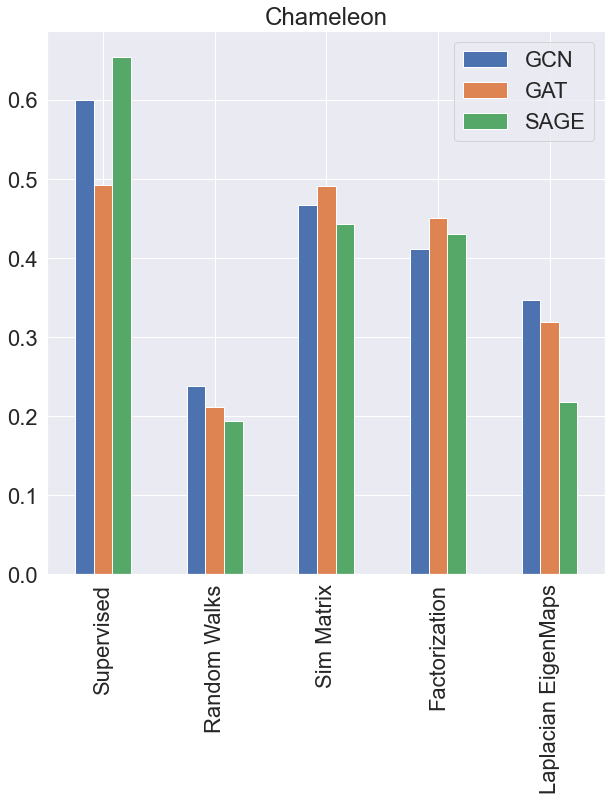

In [75]:
f, axs = plt.subplots(1,figsize=(10,10))

pd.DataFrame({'GCN': GCN_Chameleon,
                   'GAT':  GAT_Chameleon,'SAGE':SAGE_Chameleon}, index=index).plot.bar(ax=axs)
plt.title('Chameleon')


**Conv+Loss for datasets**

**CORA**

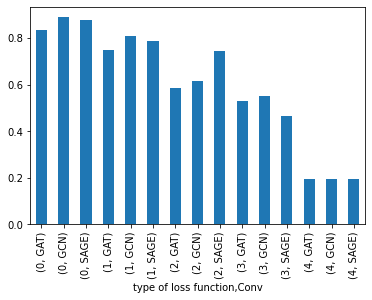

In [36]:

dataset_dict_1 = {'type of loss function':types,'Loss':losses,'Conv':convs,'Cora Micro-F1':cora_micro,'Cora Macro-F1':cora_macro}
results=pd.DataFrame.from_dict(dataset_dict_1)
results.groupby(['type of loss function','Conv']).mean().mean(axis=1).plot.bar()

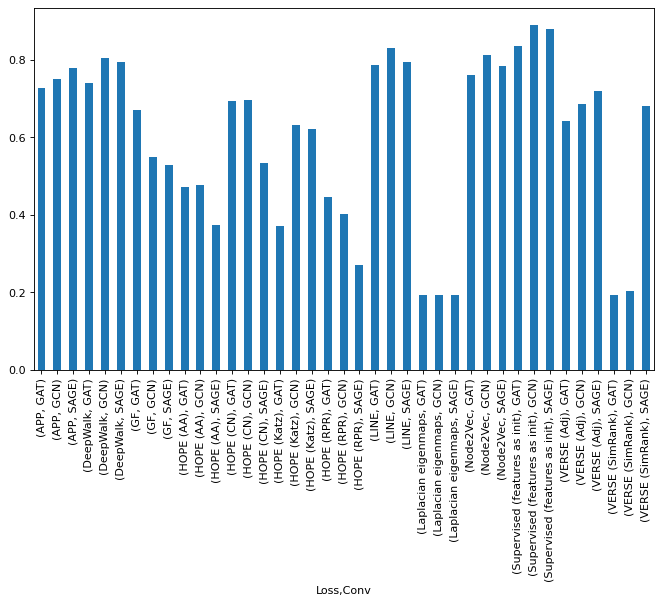

In [56]:

figure(figsize=(10, 6), dpi=80)
dataset_dict_1 = {'type of loss function':types,'Loss':losses,'Conv':convs,'Cora Micro-F1':cora_micro,'Cora Macro-F1':cora_macro}
results=pd.DataFrame.from_dict(dataset_dict_1)
results.drop('type of loss function',axis=1).groupby(['Loss','Conv']).mean().mean(axis=1).plot.bar()

In [57]:
df1=results.drop('type of loss function',axis=1).groupby(['Loss','Conv']).mean().mean(axis=1).drop('Supervised (features as init)',axis=0)
df1[df1==df1.max()]

Loss  Conv
LINE  GCN     0.8303
dtype: float64

**Cora Random Init**

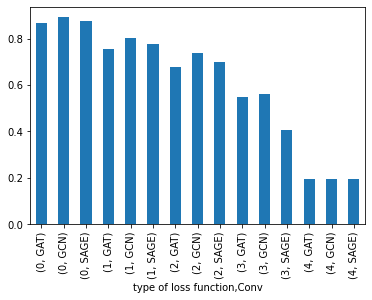

In [34]:
dataset_dict_1 = {'type of loss function':types,'Loss':losses,'Conv':convs,'Cora Random init Micro-F1':cora_random_micro,'Cora Random init Macro-F1':cora_random_macro}
results=pd.DataFrame.from_dict(dataset_dict_1)
results.groupby(['type of loss function','Conv']).mean().mean(axis=1).plot.bar()

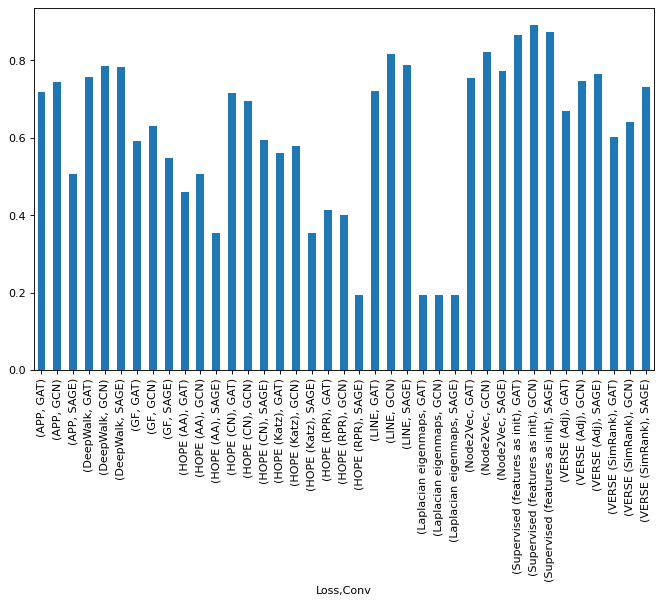

In [54]:

figure(figsize=(10, 6), dpi=80)
dataset_dict_1 = {'type of loss function':types,'Loss':losses,'Conv':convs,'Cora Random init Micro-F1':cora_random_micro,'Cora Random init Macro-F1':cora_random_macro}
results=pd.DataFrame.from_dict(dataset_dict_1)
results.drop('type of loss function',axis=1).groupby(['Loss','Conv']).mean().mean(axis=1).plot.bar()

In [55]:
df1=results.drop('type of loss function',axis=1).groupby(['Loss','Conv']).mean().mean(axis=1).drop('Supervised (features as init)',axis=0)
df1[df1==df1.max()]

Loss      Conv
Node2Vec  GCN     0.8214
dtype: float64

**Citeseer**

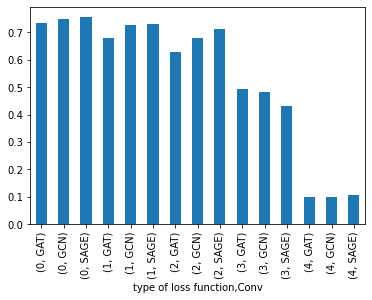

In [15]:
dataset_dict_1 = {'type of loss function':types,'Loss':losses,'Conv':convs,'Citeseer Micro-F1':citeseer_micro,'Citeseer Macro-F1':citeseer_macro}
results=pd.DataFrame.from_dict(dataset_dict_1)
results.groupby(['type of loss function','Conv']).mean().mean(axis=1).plot.bar()

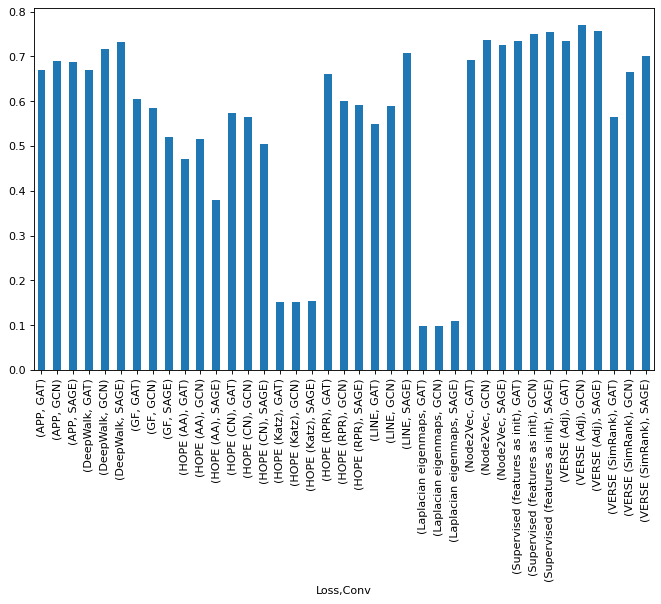

In [31]:

figure(figsize=(10, 6), dpi=80)

dataset_dict_1 = {'type of loss function':types,'Loss':losses,'Conv':convs,'Citeseer Micro-F1':citeseer_micro,'Citeseer Macro-F1':citeseer_macro}
results=pd.DataFrame.from_dict(dataset_dict_1)
results.drop('type of loss function',axis=1).groupby(['Loss','Conv']).mean().mean(axis=1).plot.bar()

In [51]:
df1=results.drop('type of loss function',axis=1).groupby(['Loss','Conv']).mean().mean(axis=1).drop('Supervised (features as init)',axis=0)
df1[df1==df1.max()]

Loss  Conv
LINE  GCN     0.8303
dtype: float64

**Photo**

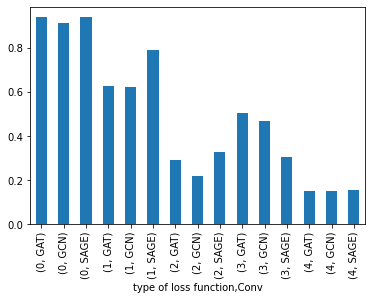

In [17]:
dataset_dict_1 = {'type of loss function':types,'Loss':losses,'Conv':convs,'Photo Micro-F1':photo_micro,'Photo Macro-F1':photo_macro}
results=pd.DataFrame.from_dict(dataset_dict_1)
results.groupby(['type of loss function','Conv']).mean().mean(axis=1).plot.bar()

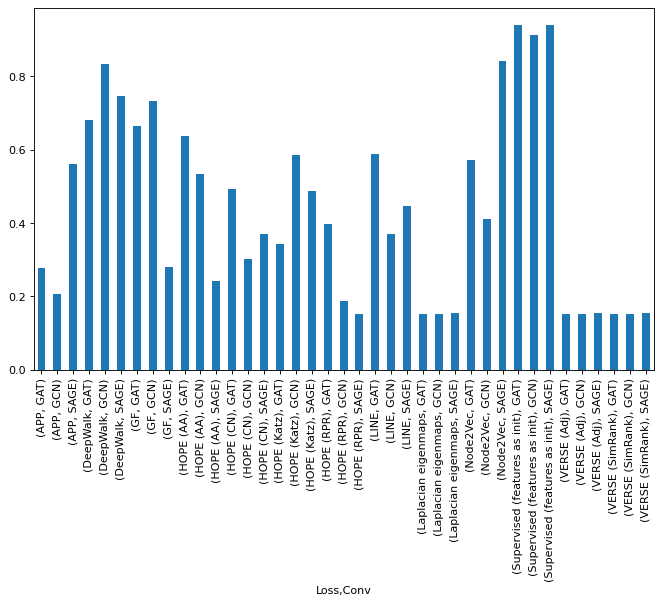

In [61]:
figure(figsize=(10, 6), dpi=80)

dataset_dict_1 = {'type of loss function':types,'Loss':losses,'Conv':convs,'Photo Micro-F1':photo_micro,'Photo Macro-F1':photo_macro}
results=pd.DataFrame.from_dict(dataset_dict_1)
results.drop('type of loss function',axis=1).groupby(['Loss','Conv']).mean().mean(axis=1).plot.bar()

In [53]:
df1=results.drop('type of loss function',axis=1).groupby(['Loss','Conv']).mean().mean(axis=1).drop('Supervised (features as init)',axis=0)
df1[df1==df1.max()]

Loss      Conv
Node2Vec  SAGE    0.84085
dtype: float64

**without Photo**

In [19]:
data_wo_photo = {'type of loss function':types,'Loss':losses,'Conv':convs,'Cora Micro-F1':cora_micro,'Cora Macro-F1':cora_macro,'Cora Random Init Micro_f1':cora_random_micro,'Cora Random Init Macro_f1':cora_random_macro, 'Citeseer Micro-F1':citeseer_micro,'Citeseer Macro-F1':citeseer_macro}
results_wo_photo=pd.DataFrame.from_dict(data_wo_photo)

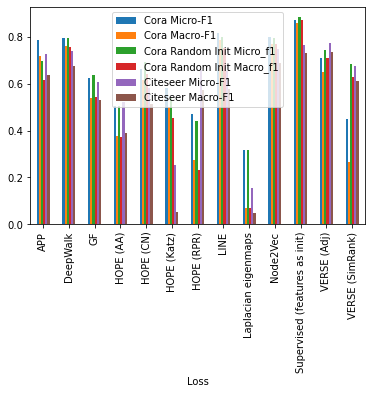

In [60]:

Loss_bar_wo_photo=(results_wo_photo.groupby('Loss').mean()).drop('type of loss function',axis=1)
Loss_bar_wo_photo.plot.bar()

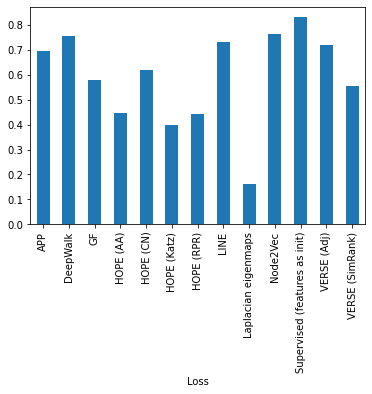

In [21]:
Loss_bar_wo_photo=(results_wo_photo.groupby('Loss').mean()).drop('type of loss function',axis=1).mean(axis=1)
Loss_bar_wo_photo.plot.bar()

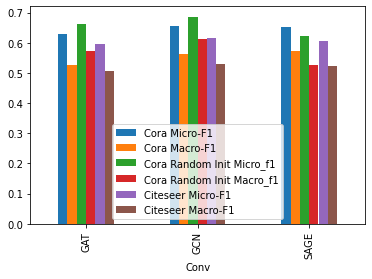

In [22]:
convs_bar=(results_wo_photo.groupby('Conv').mean()).drop('type of loss function',axis=1)
convs_bar.plot.bar()

Conv
GAT     0.582754
GCN     0.610427
SAGE    0.582762
dtype: float64

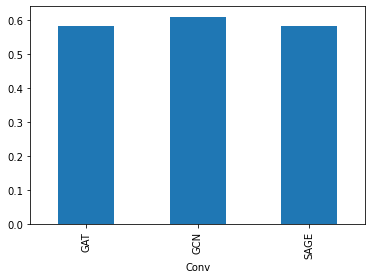

In [37]:
convs_bar=(results_wo_photo.groupby('Conv').mean()).drop('type of loss function',axis=1).mean(axis=1)
convs_bar.plot.bar()
convs_bar

**convs without laplacian eigenmaps**

In [24]:
losses_wo_laplac=['DeepWalk','DeepWalk','DeepWalk','Node2Vec','Node2Vec','Node2Vec','VERSE (Adj)','VERSE (Adj)','VERSE (Adj)', 'VERSE (SimRank)','VERSE (SimRank)','VERSE (SimRank)', 
'LINE','LINE','LINE','APP','APP','APP','HOPE (Katz)','HOPE (Katz)','HOPE (Katz)','HOPE (RPR)','HOPE (RPR)','HOPE (RPR)','HOPE (CN)','HOPE (CN)','HOPE (CN)',
'HOPE (AA)','HOPE (AA)','HOPE (AA)','GF','GF','GF','Supervised (features as init)','Supervised (features as init)','Supervised (features as init)']
convs_wo_laplac =['GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE','GCN','GAT','SAGE']

types_wo_laplac = [1]*2*3 + [2]*3*4+[3]*3*5+[0]*3
cora_micro_wo_laplac = [0.8189,0.7597,0.8078,0.8226,0.7800,0.7985,0.7188,0.6767,0.7383,0.3253,0.3179,0.7116,0.8429,0.7948,0.8189,0.7874,
0.7689,0.8004,0.6580,0.4436,0.6433,0.5028,0.5323,0.3752,0.7135,0.7227,0.5545,0.5342,0.5360,0.4399,0.6026,0.7006,0.5712,0.8946,0.8429,0.8835]
cora_macro_wo_laplac = [0.7905,0.7179,0.7793,0.7982,0.7425,0.7679,0.6500,0.6053,0.6970,0.0834,0.0689,0.6491,0.8177,0.7792,0.7684,0.7108,0.6821,0.7570,0.6053,0.2987,0.5977,0.3021,0.3570,0.1631,0.6760,0.6629,0.5110,0.4214,0.4050,0.3045,0.4928,0.6370,0.4857, 0.8846, 0.8250, 0.8737]
cora_random_micro_wo_laplac = [0.8022,0.7782,0.8004,0.8336,0.7726,0.7856,0.7616,0.6895,0.7856,0.6636,0.6451,0.7505,0.8318,0.7505,0.8115,0.7745,0.7505,0.5656,0.6081,0.5970,0.4214,0.5009,0.5046,0.3179,0.7116,0.7468,0.6192,0.5582,0.5305,0.4251,0.6636,0.6506,0.5933,0.8965,0.8743,0.8817]
cora_random_macro_wo_laplac = [0.7700,0.7387,0.7683,0.8092,0.7364,0.7580,0.7335,0.6516,0.7449,0.6178,0.5578,0.7142,0.7997,0.6909,0.7676,0.7152,0.6851,0.4470,0.5504,0.5251,0.2864,0.2976,0.3239,0.0689,0.6766,0.6854,0.5678,0.4524,0.3883,0.2832,0.5995,0.5342,0.5004,0.8882,0.8588,0.8668]
citeseer_micro_wo_laplac =[0.7534,0.7008,0.7624,0.7654,0.7233,0.7549,0.7930,0.7616,0.7689,0.6876,0.6137,0.7301,0.6286,0.5835,0.7459,0.7353,0.7158,0.7308,0.2538,0.2538,0.2544,0.6451,0.7053,0.6316,0.6030,0.6090,0.5353,0.5749,0.5453,0.4473,0.6211,0.6451,0.5579,0.7699,0.7504,0.7744]
citeseer_macro_wo_laplac = [0.6794,0.6397,0.7030,0.7080,0.6614,0.6961,0.7484,0.7095,0.7468,0.6443,0.5174,0.6702,0.5506,0.5129,0.6712,0.6428,0.6246,0.6433,0.0506,0.0506,0.0547,0.5545,0.6163,0.5504,0.5278,0.5374,0.4724,0.4546,0.3974,0.3137,0.5473,0.5653,0.4835,0.7319,0.7194,0.7368]
photo_micro_wo_laplac = [0.8503,0.6932,0.7671,0.4879,0.6645,0.8607,0.2538,0.2538,0.2544,0.2538,0.2538,0.2551,0.4644,0.6651,0.5487,0.3087,0.4127,0.6344,0.6311,0.4526,0.5612,0.2858,0.5186,0.2538,0.4179,0.5762,0.4761,0.6050,0.6913,0.3597,0.7744,0.7155,0.4160,0.9228,0.9418,0.9451]
photo_macro_wo_laplac = [0.8182,0.6657,0.7225,0.3319,0.4817,0.8210,0.0506,0.0506,0.0547,0.0506,0.0506,0.0560,0.2761,0.5099,0.3435,0.1024,0.1405,0.4855,0.5392,0.2341,0.4135,0.0902,0.2757,0.0506,0.1853,0.4106,0.2638,0.4620,0.5853,0.1229,0.6887,0.6114,0.1425,0.9020,0.9385,0.9345]
data_wo_laplac = {'type of loss function':types_wo_laplac,'Loss':losses_wo_laplac,'Conv':convs_wo_laplac,'Cora Micro-F1':cora_micro_wo_laplac,'Cora Macro-F1':cora_macro_wo_laplac,'Cora Random Init Micro_f1':cora_random_micro_wo_laplac,'Cora Random Init Macro_f1':cora_random_macro_wo_laplac, 'Citeseer Micro-F1':citeseer_micro_wo_laplac,'Citeseer Macro-F1':citeseer_macro_wo_laplac,'Photo Micro_F1':photo_micro_wo_laplac,'Photo Macro_F1':photo_macro_wo_laplac}
results_wo_laplac=pd.DataFrame.from_dict(data_wo_laplac)

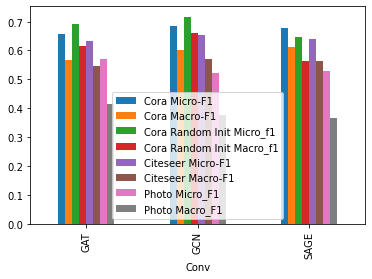

In [25]:
convs_bar=(results_wo_laplac.groupby('Conv').mean()).drop('type of loss function',axis=1)
convs_bar.plot.bar()

Conv
GAT     0.586221
GCN     0.597866
SAGE    0.575084
dtype: float64

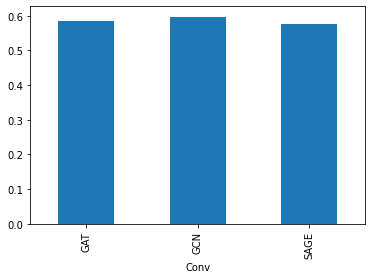

In [39]:
convs_bar=(results_wo_laplac.groupby('Conv').mean()).drop('type of loss function',axis=1).mean(axis=1)
convs_bar.plot.bar()
convs_bar

**convs without laplacian and photo**

In [27]:
data_wo_laplac_photo = {'type of loss function':types,'Loss':losses,'Conv':convs,'Cora Micro-F1':cora_micro,'Cora Macro-F1':cora_macro,'Cora Random Init Micro_f1':cora_random_micro,'Cora Random Init Macro_f1':cora_random_macro, 'Citeseer Micro-F1':citeseer_micro,'Citeseer Macro-F1':citeseer_macro}
data_wo_laplac_photo=pd.DataFrame.from_dict(data_wo_laplac_photo)

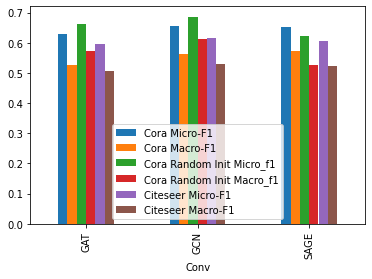

In [28]:
convs_bar=(data_wo_laplac_photo.groupby('Conv').mean()).drop('type of loss function',axis=1)
convs_bar.plot.bar()

Conv
GAT     0.582754
GCN     0.610427
SAGE    0.582762
dtype: float64

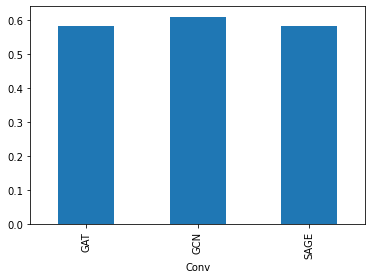

In [40]:
convs_bar=(data_wo_laplac_photo.groupby('Conv').mean()).drop('type of loss function',axis=1).mean(axis=1)

convs_bar.plot.bar()
convs_bar

**LP**

,Arxiv
Тип функции потерь,
Factorization,0.774967
Laplacian EigenMaps,0.513100
Random Walks,0.822517
SimMatrix,0.716533


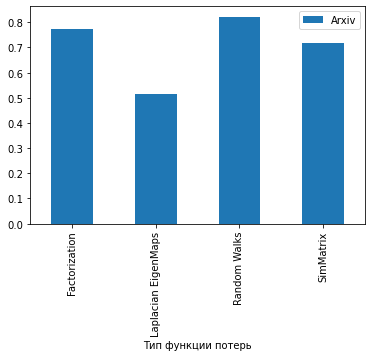

In [17]:
results_lp
convs_bar=(results_lp.groupby('Тип функции потерь').mean())#.drop('Тип функции потерь',axis=1).mean(axis=1)

convs_bar.plot.bar()
convs_bar

In [20]:
results_lp.groupby(['Тип функции потерь','Сверточный слой']).mean()

Arxiv
Тип функции потерь  Сверточный слой         
Factorization       GAT              0.79656
                    GCN              0.75914
                    SAGE             0.76920
Laplacian EigenMaps GAT              0.52380
                    GCN              0.51550
                    SAGE             0.50000
Random Walks        GAT              0.85595
                    GCN              0.84745
                    SAGE             0.76415
SimMatrix           GAT              0.71524
                    GCN              0.72444
                    SAGE             0.70992

Text(0.5, 1.0, 'Arxiv')

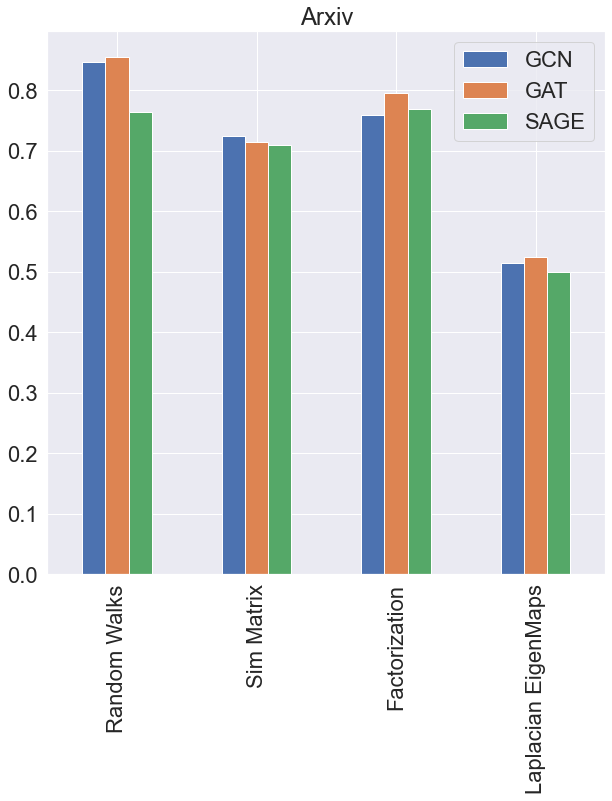

In [77]:
from matplotlib import pyplot as plt
index = ['Random Walks','Sim Matrix','Factorization', 'Laplacian EigenMaps']
GCN = [0.84745,0.72444,0.75914,0.51550]
GAT = [0.85595,0.71524,0.79656,0.52380]
SAGE =  [0.76415,0.70992,0.76920,0.50000]


f, axs = plt.subplots(1,figsize=(10,10))


pd.DataFrame({'GCN': GCN,
                   'GAT':  GAT,'SAGE':SAGE}, index=index).plot.bar(ax = axs)
plt.title('Arxiv')



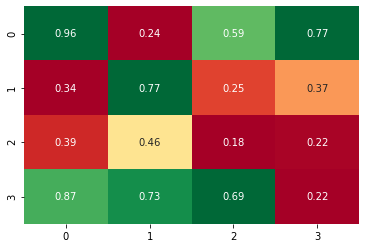

In [23]:
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
import seaborn as sns
df = pd.DataFrame(np.random.rand(4,4))

cm = ['RdYlGn']*4
f, axs = plt.subplots(1, df.columns.size, gridspec_kw={'wspace': 0})
for i, (s, a, c) in enumerate(zip(df.columns, axs, cm)):
    sns.heatmap(np.array([df[s].values]).T, yticklabels=df.index, xticklabels=[s], annot=True, fmt='.2f', ax=a, cmap=c, cbar=False)
    if i>0:
        a.yaxis.set_ticks([])